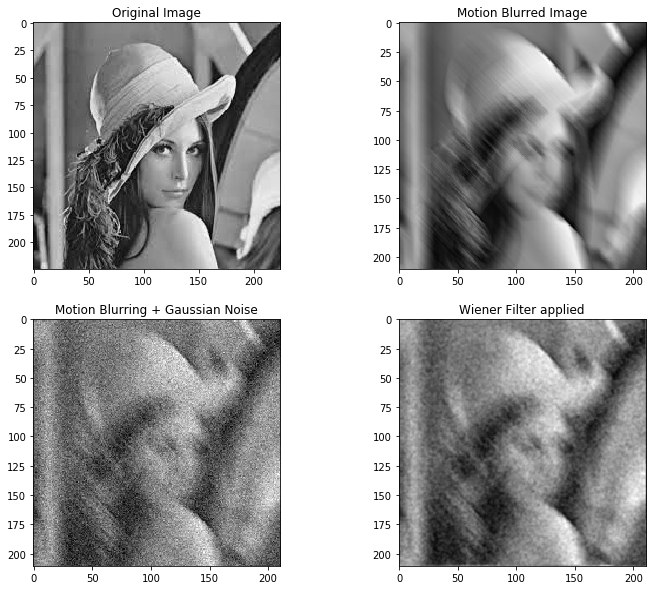

In [2]:
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt

def blur(img, kernel_size = 3):
	dummy = np.copy(img)
	h = np.eye(kernel_size) / kernel_size
	dummy = convolve2d(dummy, h, mode = 'valid')
	return dummy

def add_gaussian_noise(img, sigma):
	gauss = np.random.normal(0, sigma, np.shape(img))
	noisy_img = img + gauss
	noisy_img[noisy_img < 0] = 0
	noisy_img[noisy_img > 255] = 255
	return noisy_img

def wiener_filter(img, kernel, K):
	kernel /= np.sum(kernel)
	dummy = np.copy(img)
	dummy = fft2(dummy)
	kernel = fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	dummy = dummy * kernel
	dummy = np.abs(ifft2(dummy))
	return dummy

def gaussian_kernel(kernel_size = 3):
	h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
	h = np.dot(h, h.transpose())
	h /= np.sum(h)
	return h

def rgb2gray(rgb):
	return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


if __name__ == '__main__':
	# Load image and convert it to gray scale
	file_name = os.path.join('/home/raja/kmit/classes/lena_rgb.jpeg') 
	img = rgb2gray(plt.imread(file_name))

	# Blur the image
	blurred_img = blur(img, kernel_size = 15)

	# Add Gaussian noise
	noisy_img = add_gaussian_noise(blurred_img, sigma = 20)

	# Apply Wiener Filter
	kernel = gaussian_kernel(3)
	filtered_img = wiener_filter(noisy_img, kernel, K = 10)

	# Display results
	display = [img, blurred_img, noisy_img, filtered_img]
	label = ['Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise', 'Wiener Filter applied']

	fig = plt.figure(figsize=(12, 10))

	for i in range(len(display)):
		fig.add_subplot(2, 2, i+1)
		plt.imshow(display[i], cmap = 'gray')
		plt.title(label[i])

	plt.show()

In [7]:
import cv2
import numpy as np
from skimage.measure import compare_ssim as ssim

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are

def diff_remove_bg(img0, img, img1):
    d1 = diff(img0, img)
    d2 = diff(img, img1)
    return cv2.bitwise_and(d1, d2)

x1 = cv2.imread("/home/raja/kmit/classes/face_filter.jpeg")
x2 = cv2.imread("/home/raja/kmit/classes/face_filtr2.png")

x1 = cv2.cvtColor(x1, cv2.COLOR_BGR2GRAY)
x2 = cv2.cvtColor(x2, cv2.COLOR_BGR2GRAY)

absdiff = cv2.absdiff(x1, x2)
cv2.imwrite("/home/raja/kmit/classes/absdiff.png", absdiff)

diff = cv2.subtract(x1, x2)
result = not np.any(diff)

m = mse(x1, x2)
s = ssim(x1, x2)

print("mse: %s, ssim: %s" % (m, s))

if result:
    print("The images are the same")
else:
    cv2.imwrite("images/diff.png", diff)
    print("The images are different")

error: OpenCV(4.1.1) /io/opencv/modules/core/src/arithm.cpp:663: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'
